# <font size=35 color=lightgreen>** Sentiment API **<font>
---

### <font size=12 color=lightgreen>Configuración Inicial (Librerías)</font>

#### 1. Procesamiento y Manipulación de Datos
* **`pandas`**
    * Nos ayuda con la manipulación y análisis de datos estructurados.
    * Carga el dataset (CSV), gestiona el DataFrame y permite filtrar o limpiar registros.
* **`numpy`**
    * Realiza las operaciones matemáticas y manejo de arrays eficientes.
    * Soporte numérico fundamental para las transformaciones vectoriales de los textos.

#### 2. Visualización y Análisis Exploratorio

* **`matplotlib.pyplot`**
    * Generación de gráficos estáticos.
    * Visualización básica de la distribución de clases (Positivo vs. Negativo).
* **`seaborn`**
    * Visualización de datos estadísticos avanzada.
    * Generación de matrices de confusión y gráficos de distribución estéticos para la presentación.

#### 3. Procesamiento de Lenguaje Natural (NLP) y Limpieza

* **`re`** (Regular Expressions)
    * Manejo de expresiones regulares.
    * Eliminación de ruido en el texto: URLs, menciones (@usuario), hashtags (#) y caracteres especiales no alfanuméricos.
* **`string`**
    * Constantes de cadenas comunes.
    * Provee listas estándar de signos de puntuación para su eliminación eficiente.

#### 4. Modelado y Machine Learning (Core)

* **`scikit-learn`**
    * Biblioteca principal de Machine Learning.
    * **`TfidfVectorizer`**: Transforma el texto limpio en vectores numéricos.
    * **`LogisticRegression`**: Algoritmo de clasificación supervisada.
    * **`metrics`**: Cálculo de precisión, recall y F1-score.
    * **`Pipeline`**: Encapsulamiento de los pasos de transformación y predicción.

#### 5. Persistencia e Integración
Herramientas para conectar el modelo con el Backend.

* **`joblib`**
    * Serialización eficiente de objetos Python.
    * Exportar (`dump`) el pipeline entrenado a un archivo `.joblib` y cargarlo (`load`) en la API para realizar predicciones.
* **`fastapi` & `uvicorn`**
    * Framework web moderno de alto rendimiento.
    * Exponer el modelo entrenado como un microservicio REST (endpoint `/predict`) para ser consumido por el Backend en Java.




---



### <font size=16  color=lightgreen> Importando librerías <font>



In [435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import uvicorn
import sklearn
import fastapi
import joblib
import unicodedata
import warnings
warnings.filterwarnings('ignore')

### <font size = 8 color="lightgreen">Importación del dataset <font>

In [436]:
data1 = pd.read_csv('https://raw.githubusercontent.com/ml-punto-tech/sentiment-api/refs/heads/main/data-science/datasets/sentimentdataset_es.csv',encoding='utf-8', sep=';', on_bad_lines='warn')

In [437]:
data2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SentimentAPI/sentiment_analysis_dataset.csv', encoding='latin-1',sep=';', on_bad_lines='warn')

### <font size= 12 color="lightgreen" >Explorando los datasets<font>

#### **Explorando Data1**

In [438]:
data1.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [439]:
data1.sample(5)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
431,127,129,Agradecimiento por el apoyo recibido en moment...,Gratitud,10-03-2012 8:30,SupportiveFriend,Facebook,#Gratitud #Apoyo,15,30,India,2012,3,10,8
170,259,263,"Caminando con confianza, huellas de seguridad ...",Confiado,15-02-2022 13:15,SandStrider,Instagram,#Confiado #HuellasDeSeguridad,25,50,Australia,2022,2,15,13
290,379,383,Abrazando la emoción de la velocidad en los em...,Emoción,25-07-2020 12:45,RollercoasterFan,Facebook,#Emoción #AventuraEnMontañaRusa,22,45,Alemania,2020,7,25,12
0,303,307,"Abrumado por el peso del mundo, Atlas con los ...",Abrumado,25-06-2021 17:50,AtlasBearer,Instagram,#Abrumado #BouldersOfExhaustion,22,44,Canadá,2021,6,25,17
113,93,95,Anticipando el estreno de una película muy esp...,Anticipación,26-02-2023 7:30,MovieBuff2,Instagram,#Anticipación #EstrenoPelícula,20,40,Australia,2023,2,26,7


#### **Explorando Data2**

In [440]:
data2.sample(5)

,texto,label,sentimiento
849,"Se lo que vas a decir papá y créeme, estoy de ...",0,negativo
1914,"Tengo un grave problema, que ya se me salió de...",1,neutral
2080,He concluido la experiencia de 'La sociedad de...,1,neutral
1729,"Siento que mi trabajo lo manifesté, porque des...",2,positivo
524,QUÉ PÁGINA VERGA SOS MOVISTAR ARENA MÁS DE 3HS...,0,negativo


### <font size=12 color=lightgreen> Creando los dataframe filtrados </font>

#### **Creando dataframe filtrado Data1**

In [441]:
#Renombrar columna Text por Texto
data1.rename(columns={'Text': 'Texto'}, inplace=True)

# Crar df_filtrado con columnas Texto y Sentiment
data1_filtrado = data1[['Texto', 'Sentiment']]

# Eliminar registros nulos y datos nulos
data1_filtrado.dropna(inplace=True)
data1_filtrado = data1_filtrado[data1_filtrado['Texto'].notna()]

data1_filtrado.sample(5)

,Texto,Sentiment
496,Tener un mal día con el cabello y sentirse coh...,Malo
193,Contentamiento en medio de una reunión familia...,Contentamiento
532,"Revisando fotografías antiguas, atrapadas en e...",Nostalgia
436,Agradecimiento de todo corazón por las risas c...,Gratitud
248,"Los susurros de desesperación, la súplica sile...",Desesperación


#### **Creando dataframe filtrado Data2**

In [442]:
data2_filtrado = data2[['texto', 'sentimiento']]
data2_filtrado.sample(5)

,texto,sentimiento
437,"Cuando me siento solo, triste, aburrido, feliz...",negativo
1896,"Pensar en positivo, solamente me queda eso",neutral
1960,"One X-Men, CEO de PANTERAS NEGRAS FEDERALES, e...",neutral
30,"Desbordante y efervescente, pero a qué costo?",negativo
2373,se hacía la linda con mis lentes ????,positivo


### <font size=12 color=lightgreen>Limpiar textos</font>

#### **Función para limpieza de textos**

In [443]:
def pre_proccess_text(texto):
    # 1. Convertir a minúsculas
    texto = texto.lower()

    # 2. Normaliza el texto para separar las tildes de las letras
    texto = unicodedata.normalize('NFD', texto)

    # 3. Filtra y se queda solo con los caracteres que no son tildes
    texto = texto.encode('ascii', 'ignore').decode("utf-8")

    # 4. Eliminar URLs (http, https, www)
    texto = re.sub(r'https?://\S+|www\.\S+', '', texto)

    # 5. Eliminar hashtags (#Haghtag)
    # El patrón r'#\w+' busca el símbolo # seguido de caracteres alfanuméricos
    texto = re.sub(r'#\w+', '', texto)

    # 6. Eliminar menciones (@usuario)
    texto = re.sub(r'@\w+', '', texto)

    # 7. Eliminar caracteres especiales y números (opcional, según tu criterio)
    texto = re.sub(r'[^\w\s]', '', texto)

    # 8 Eliminar emojis
    texto = re.sub(r'[^\x00-\x7F]+', '', texto)


    # 8. Eliminar espacios extra
    texto = texto.strip()

    return texto


#### **Limpieza Data1**

In [444]:

# Aplicar al DataFrame
data1_filtrado['Texto_Limpio'] = data1_filtrado['Texto'].apply(pre_proccess_text)

# Mostrar un ejemplo del antes y después
print(data1_filtrado[['Texto', 'Texto_Limpio']].head())


                                               Texto  \
0  Abrumado por el peso del mundo, Atlas con los ...   
1  Abrumado por la cacofonía de las expectativas,...   
2  Abrumado por el laberinto de expectativas, un ...   
3  Abrumado por el apoyo recibido durante un desa...   
4  Llega el aburrimiento, el día se siente infini...   

                                        Texto_Limpio  
0  abrumado por el peso del mundo atlas con los h...  
1  abrumado por la cacofonia de las expectativas ...  
2  abrumado por el laberinto de expectativas un m...  
3  abrumado por el apoyo recibido durante un desa...  
4  llega el aburrimiento el dia se siente infinit...  


#### **Limpieza Data2**

In [445]:
data2_filtrado['texto_limpio'] = data2_filtrado['texto'].apply(pre_proccess_text)
# Mostrar un ejemplo del antes y después
print(data1_filtrado[['Texto', 'Texto_Limpio']].head())



                                               Texto  \
0  Abrumado por el peso del mundo, Atlas con los ...   
1  Abrumado por la cacofonía de las expectativas,...   
2  Abrumado por el laberinto de expectativas, un ...   
3  Abrumado por el apoyo recibido durante un desa...   
4  Llega el aburrimiento, el día se siente infini...   

                                        Texto_Limpio  
0  abrumado por el peso del mundo atlas con los h...  
1  abrumado por la cacofonia de las expectativas ...  
2  abrumado por el laberinto de expectativas un m...  
3  abrumado por el apoyo recibido durante un desa...  
4  llega el aburrimiento el dia se siente infinit...  


### <font size=12 color=lightgreen> Categorizar sentimientos </font>

In [446]:
# 1. Definimos las listas de sentimientos según su categoría
# Ver todos los sentimientos únicos para saber qué agrupar
print(data1_filtrado['Sentiment'].unique())


['Abrumado' 'Aburrimiento' 'Aceptación' 'Admiración' 'Adoración'
 'Adrenalina' 'Afecto' 'Agotamiento' 'Agradecido' 'Agridulce'
 'Aislamiento' 'Alegría' 'Alegría al hornear' 'Alegría festiva'
 'Alegría juguetona' 'Alivio' 'Amabilidad' 'Amable' 'Amar' 'Amargura'
 'Ambivalencia' 'Amistad' 'Amor perdido' 'Angustia' 'Anhelo' 'Ánimo'
 'Ansiedad' 'Anticipación' 'Apreciación' 'Aprensivo' 'Armonía'
 'Arrepentimiento' 'Asco' 'Asombro' 'Aventura' 'Aventura Culinaria'
 'Bendición' 'Cálculo erróneo' 'Calma' 'Capricho' 'Cautivación'
 'Cazador de sueños' 'Celebración' 'Celos' 'Celoso' 'Chispa' 'Colorido'
 'Comodidad' 'Compasión' 'Compasivo' 'Compromiso' 'Conexión' 'Confiado'
 'Confianza' 'Confusión' 'Consciencia' 'Consuelo' 'Contemplación'
 'Contentamiento' 'Creatividad' 'Creatividad de la pasarela'
 'Cumplimiento' 'Curiosidad' 'De espíritu libre' 'Decepción' 'Desafío'
 'Desamor' 'Descubrimiento' 'Desesperación' 'Deslumbrar' 'Despectivo'
 'Determinación' 'Devastado' 'Disfrute' 'Diversión' 'Dolor' 'El

In [447]:
# 1. SENTIMIENTOS POSITIVOS (Bienestar, éxito, alegría)
positivos = [
    'Aceptacion', 'Admiracion', 'Adoracion', 'Adrenalina', 'Afecto', 'Agradecido',
    'Alegria', 'Alegria al hornear', 'Alegria festiva', 'Alegria juguetona', 'Alivio',
    'Amabilidad', 'Amable', 'Amar', 'Amistad', 'Animo', 'Apreciacion', 'Armonia',
    'Asombro', 'Aventura', 'Aventura culinaria', 'Bendicion', 'Calma', 'Capricho',
    'Cautivacion', 'Cazador de suenos', 'Celebracion', 'Chispa', 'Colorido', 'Comodidad',
    'Compasion', 'Compasivo', 'Compromiso', 'Conexion', 'Confiado', 'Confianza',
    'Consciencia', 'Consuelo', 'Contentamiento', 'Creatividad', 'Creatividad de la pasarela',
    'Cumplimiento', 'De espiritu libre', 'Descubrimiento', 'Deslumbrar', 'Determinacion',
    'Disfrute', 'Diversion', 'Elacion', 'Elegancia', 'Emocion', 'Emocionado', 'Empatico',
    'Empoderamiento', 'Encantamiento', 'Encanto', 'Energia', 'Entusiasmo', 'Esfuerzo renovado',
    'Esperanza', 'Euforia', 'Excitacion', 'Exito', 'Exploracion', 'Explosion artistica',
    'Extasis', 'Fascinante', 'Felicidad', 'Feliz', 'Grandeza', 'Gratitud', 'Hipnotico',
    'Iconico', 'Imaginacion', 'Inmersion', 'Inspiracion', 'Inspiracion creativa', 'Inspirado',
    'Intriga', 'Jugueton', 'La belleza de la naturaleza', 'La libertad del oceano', 'Libertad',
    'Lleno de alegria', 'Logro', 'Magia de invierno', 'Maravilla', 'Maravilla celestial',
    'Melodico', 'Motivacion', 'Optimismo', 'Orgullo', 'Orgulloso', 'Positividad', 'Positivo',
    'Reconfortante', 'Rejuvenecimiento', 'Resiliencia', 'Resplandor', 'Reunion alegre',
    'Reverencia', 'Romance', 'Satisfaccion', 'Serenidad', 'Tranquilidad', 'Triunfo',
    'Vibrancia', 'Viaje emocionante'
]


# 2. SENTIMIENTOS NEGATIVOS (Dolor, ira, miedo, estrés)
negativos = [
    'Abrumado', 'Aburrimiento', 'Agotamiento', 'Agridulce', 'Aislamiento', 'Amargura',
    'Amor perdido', 'Angustia', 'Anhelo', 'Ansiedad', 'Aprensivo', 'Arrepentimiento',
    'Asco', 'Celos', 'Celoso', 'Decepcion', 'Desafio', 'Desamor', 'Desesperacion',
    'Despectivo', 'Devastado', 'Dolor', 'Enojo', 'Entumecimiento', 'Envidia', 'Envidiar',
    'Envidioso', 'Frustracion', 'Frustrado', 'Impotencia', 'Intimidacion', 'Lastima',
    'Malo', 'Melancolia', 'Miedo', 'Negativo', 'Obstaculo', 'Odiar', 'Oscuridad', 'Pena',
    'Perdida', 'Presion', 'Resentimiento', 'Soledad', 'Sufrimiento', 'Temeroso', 'Temor',
    'Tormenta emocional', 'Traicion', 'Tristeza', 'Tristezaza', 'Verguenza'
]

# 3. SENTIMIENTOS NEUTRALES (O "Grises" que no definen éxito/fracaso)
# Aquí incluimos "Confuso" (Blender) y otros estados contemplativos
neutros = [
    'Ambivalencia', 'Anticipacion', 'Calculo erroneo', 'Confusion', 'Confuso',
    'Contemplacion', 'Curiosidad', 'Indiferencia', 'Neutral', 'Nostalgia',
    'Odisea culinaria', 'Pensive', 'Preguntarse', 'Reflexion', 'Restos',
    'Suspenso', 'Susurros del pasado', 'Travieso', 'Viaje', 'Viaje interior',
    'Visualizando la historia'
]

### <font color=lightgreen size=12>Función para categorizar sentimiento</font>

#### **Función para categorizar sentimientos**

In [448]:
def categorizar_sentimiento(sentimiento):
    # Limpiamos espacios en blanco y estandarizamos a título
    sent = str(sentimiento).strip().title()

    if sent in positivos:
        return 'positivo'
    elif sent in negativos:
        return 'negativo'
    else:
        # Por defecto, lo que no conocemos o es ambiguo va a Neutral para el MVP
        return 'neutral'


In [449]:
# 2. Aplicamos la función a tu columna 'Sentimiento'
data1_filtrado['Sentimiento_Final'] = data1_filtrado['Sentiment'].apply(categorizar_sentimiento)

#### **Distribución de sentimiento Data1**

In [450]:

# 3. Verificamos la distribución
print(data1_filtrado['Sentimiento_Final'].value_counts())

Sentimiento_Final
neutral     330
positivo    250
negativo    152
Name: count, dtype: int64


#### **Distribución de sentimientos Data2**

In [451]:
print(data2_filtrado['sentimiento'].value_counts())

sentimiento
negativo    1148
positivo     981
neutral      411
Name: count, dtype: int64


### <font size=12 color=lightgreen> Exportar</font>

#### **Preparación para exportar Data1**

In [452]:
# Eliminar posibles nulos generados tras la limpieza
# df_entrega = df_filtrado.dropna(subset=['Texto_Limpio'])
data1_limpio = data1_filtrado[data1_filtrado['Texto_Limpio'].str.strip() != ""]
data1_limpio = data1_limpio[data1_limpio['Sentimiento_Final'].notna()]
data1_limpio = data1_limpio[['Texto_Limpio','Sentimiento_Final']]
data1_limpio.sample(5)

,Texto_Limpio,Sentimiento_Final
643,meditando junto al sereno lago encontrando la ...,positivo
489,disfrutando del brillo del logro cada hito es ...,positivo
33,asfixiandose en el silencio de la soledad dond...,negativo
124,evitando las espinas del arrepentimiento camin...,negativo
381,me uni al club de teatro para dar rienda suelt...,neutral


#### **Preparación para exportar Data2**

In [453]:
# Create the 'Sentimiento_Final' column for data2_filtrado using the existing 'sentimiento' column
data2_filtrado['Sentimiento_Final'] = data2_filtrado['sentimiento'].apply(categorizar_sentimiento)

# Seleccionar solo lo necesario y renombrar la columna limpia para consistencia
data2_limpio = data2_filtrado[['texto_limpio', 'Sentimiento_Final']]
data2_limpio.rename(columns={'texto_limpio': 'Texto_Limpio'}, inplace=True)
data2_limpio.sample(5)

,Texto_Limpio,Sentimiento_Final
962,no puedo hablarte sin mandarte 7 mensajes hab...,negativo
2394,oficialmente manana se estrena el primer capit...,positivo
348,loco yo no podria jugar con los ateez soy dema...,negativo
53,bocagrande colapsado trafico imposible,negativo
826,pa que fume ese maldito cogollo me dejo desori...,negativo


#### **Creando exportable**

In [454]:

# ignore_index=True es fundamental para que el índice sea correlativo del 0 al total
df_unificado = pd.concat([data1_limpio, data2_limpio], ignore_index=True)

# 2. Mostrar información del nuevo dataset
print(f"Registros en dataset 1: {len(data1_limpio)}")
print(f"Registros en dataset 2: {len(data2_limpio)}")
print(f"Total de registros unificados: {len(df_unificado)}")

# 3. Vista previa
df_unificado.head()

Registros en dataset 1: 732
Registros en dataset 2: 2540
Total de registros unificados: 3272


,Texto_Limpio,Sentimiento_Final
0,abrumado por el peso del mundo atlas con los h...,negativo
1,abrumado por la cacofonia de las expectativas ...,negativo
2,abrumado por el laberinto de expectativas un m...,negativo
3,abrumado por el apoyo recibido durante un desa...,negativo
4,llega el aburrimiento el dia se siente infinit...,negativo


<bound method Series.sort_values of Sentimiento_Final
negativo    1300
positivo    1231
neutral      741
Name: count, dtype: int64>


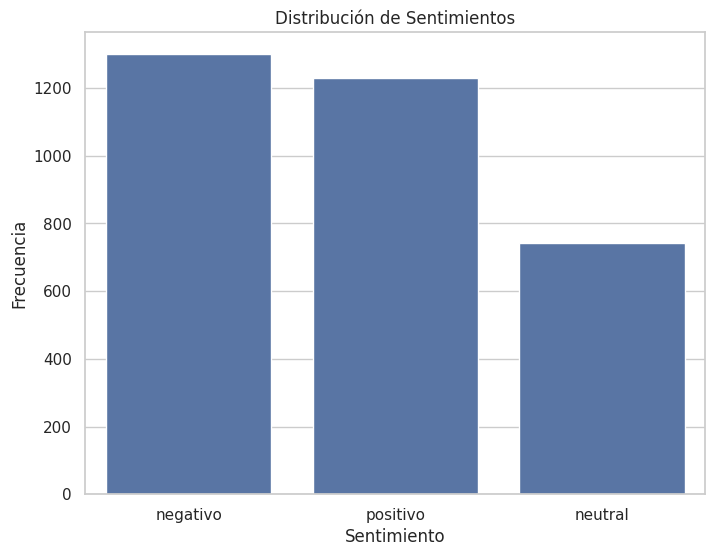

In [455]:

# Distribución de los sentimientos
print(df_unificado['Sentimiento_Final'].value_counts().sort_values)
# Gráfico Distribución de sentimientos del df_unificado ordenado descendente columnas
plt.figure(figsize=(8, 6))
sns.countplot(data=df_unificado, x='Sentimiento_Final', order=df_unificado['Sentimiento_Final'].value_counts().index)
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()


#### **Exportar**

In [456]:
# Exportar
df_unificado.to_csv('/content/drive/MyDrive/Colab Notebooks/SentimentAPI/dataset_listo_para_ML.csv', index=False)

print("Dataset exportado exitosamente.")

Dataset exportado exitosamente.


---
### <font size=12 color=lightgreen>Observaciones</font>


#### **Origen de los datos**

Con el objetivo de mejorar la capacidad de generalización del modelo, se trabajó con dos datasets independientes obtenidos desde Kaggle.
Si bien ambos conjuntos de datos abordan el análisis de sentimiento en español, presentan diferencias en estructura, calidad lingüística y formato de origen. Su integración permitió ampliar la diversidad de expresiones textuales, reduciendo el sesgo hacia un único estilo de redacción y fortaleciendo la robustez del pipeline de preparación de datos en escenarios similares a producción.

#### **Fuentes de datos (Kaggle):**

https://www.kaggle.com/datasets/engineercolsoquas/spanish-sentiment-analysis-dataset

https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset


---
### **Informe de Desafíos Técnicos y Soluciones**

#### **Dataset** 1 – Inconsistencias en el idioma

- Problema: El dataset original presentaba traducciones incompletas, combinando registros en español con fragmentos en su idioma original, además de traducciones literales de baja calidad. Esta situación afectaba la coherencia semántica del texto y podía introducir ruido en el análisis de sentimiento.

- Solución aplicada: Se utilizó la herramienta de Traducción de Microsoft Excel como apoyo para identificar registros no traducidos. No obstante, la corrección se realizó de forma manual y supervisada, revisando y ajustando cada registro individualmente con el fin de preservar el significado original del texto y evitar distorsiones semánticas. Posteriormente, se realizó una revisión manual (sanity check) para asegurar la consistencia lingüística del dataset completo.

- Impacto en el análisis: La normalización del idioma permitió obtener un corpus coherente en español, reduciendo ambigüedades y mejorando la calidad de los datos de entrada para la etapa de clasificación de sentimiento.


**Dataset 2 – Problemas de codificación de caracteres (encoding)**

- Problema:
El segundo dataset se encontraba en formato Excel y presentaba errores de codificación al ser abierto, evidenciados por la aparición de caracteres especiales incorrectos (mojibake), lo que impedía un procesamiento adecuado del texto.

- Solución aplicada:
Como primer paso, el archivo fue exportado a formato CSV. Posteriormente, se realizó la ingesta mediante Power Query, donde se configuró explícitamente la codificación Unicode (UTF-8), corrigiendo la estructura de caracteres antes de su integración al pipeline de preparación de datos.

- Impacto en el análisis:
La corrección del encoding aseguró la correcta interpretación de caracteres propios del idioma español, evitando pérdidas de información y mejorando la calidad del texto procesado.


---
#### **Definición de Datos**

Dataset exportable:

**Texto_Limpio:** Texto normalizado (minúsculas y sin puntuación), posterior a la corrección de idioma y codificación.

**Sentimiento_Final:** Variable categórica objetivo, codificada como 0 = Negativo, 1 = Neutral, 2 = Positivo.